# Data Model -  Regression

## Initial Setup for XGBoost

In [1]:
#installation for xgboost
!pip install xgboost 

## Import Libraries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import set_config
set_config(print_changed_only=False)
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing 
import math
%matplotlib inline
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")


## Loading dataset 

In [3]:
#Loading Data
train_final = pd.read_csv (r'D:\Jupyter\Merged\train_final.csv')  
train_final.Date = pd.to_datetime(train_final.Date,format='%Y-%m-%d')
train_final.index = train_final.Date
train_final = train_final.drop('Date', axis=1)

## Regressions (Imported from 2 Data Model- Regressions)

In [4]:
##Setting training and test set arranged by date order (Included all variables used to determine)
train_data, test_data = train_test_split(train_final, train_size = 0.7,shuffle=False)
X_train, y_train = train_data[['Store', 'Dept','IsHoliday','Type','Size','Year','Week']], train_data['Weekly_Sales']
X_test, y_test = test_data[['Store', 'Dept','IsHoliday','Type','Size','Year','Week']], test_data['Weekly_Sales']

#Decision tree model
dt = DecisionTreeRegressor(min_samples_split=54,min_samples_leaf=25,max_depth=440,random_state=42)
dt=dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=200,min_samples_split=15, min_samples_leaf=8,max_depth=200)        
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

#XGBoost
xgb=xgb.XGBRegressor(min_child_weight=5,max_depth=25,learning_rate=0.05,gamma=0.1,colsample_bytree=0.7)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

##  Imported from 1 Data Model- Time Series

In [5]:
#import final version of the train csv made from previous Jupyter Notebook
train_final = pd.read_csv (r'D:\Jupyter\Merged\train_final.csv')  
train_final.Date = pd.to_datetime(train_final.Date,format='%Y-%m-%d')
train_final.index = train_final.Date
train_final = train_final.drop('Date', axis=1)

#Setting training and test set arranged by date order (exlude all but Weekly Sales)
train_final1 = train_final.groupby(train_final.index).mean()
train_finalS=train_final1['Weekly_Sales']
train_data = train_final1[:int(0.7*(len(train_final1)))]
test_data = train_final1[int(0.7*(len(train_final1))):]

train_data = train_data['Weekly_Sales']
test_data = test_data[['Weekly_Sales','IsHoliday']]

#Loading preset of AR
model_ar=AR(train_data)
model_ar_fit=model_ar.fit()
predictions_AR = model_ar_fit.predict(start=100,end=142)

#Loading preset of MA
model_ma = ARMA(train_data, order=(2,0))
model_fit = model_ma.fit(disp=False)
predictions_MA = model_fit.predict(100,142)

#Loading preset of ARIMA
model_ARIMA=ARIMA(train_data,order=(2,0,0))
model_ARIMA_fit=model_ARIMA.fit(disp=-1)
predictions_ARIMA=model_ARIMA_fit.predict(start=100,end=142)

#Loading preset of SARIMA
model_SARIMA = SARIMAX(train_data, order=(1, 0, 2), seasonal_order=(1,0,1,52))
model_SARIMA_fit = model_SARIMA.fit(disp=False)
predictions_SARIMA=model_SARIMA_fit.predict(start=100,end=142)

#Loading preset of Holt Winters Method
model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=52, trend='mul',seasonal='add').fit() 
prediction_Holt = model_holt_winters.predict(start=100,end=142)

## Comparison of the Models with MSE, RMSE, MAE

In [6]:
print('MSE')
print('1','Holt', round(mean_squared_error(test_data.Weekly_Sales,prediction_Holt),2))
print('2','SARIMA', round(mean_squared_error(test_data.Weekly_Sales,predictions_SARIMA),2))
print('3','ARIMA', round(mean_squared_error(test_data.Weekly_Sales,predictions_ARIMA),2))
print('4','MA', round(mean_squared_error(test_data.Weekly_Sales,predictions_MA),2))
print('5','AR', round(mean_squared_error(test_data.Weekly_Sales,predictions_AR),2))
print('6','XGB', round(mean_squared_error(y_test,y_pred_xgb),2))
print('7','RFR', round(mean_squared_error(y_test,y_pred_rfr),2))
print('8','DT', round(mean_squared_error(y_test,y_pred_dt),2))

print(" ")
print('RMSE')
print('1','Holt', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, prediction_Holt)),2))
print('2','SARIMA', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, predictions_SARIMA)),2))
print('3','ARIMA', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, predictions_ARIMA)),2))
print('4','MA', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, predictions_MA)),2))
print('5','AR', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, predictions_AR)),2))
print('6','XGB', round(math.sqrt(mean_squared_error(y_test,y_pred_xgb)),2))
print('7','RFR', round(math.sqrt(mean_squared_error(y_test,y_pred_rfr)),2))
print('8','DT', round(math.sqrt(mean_squared_error(y_test,y_pred_dt)),2))

print(" ")
print('MAE')
print('1','Holt', round(mean_absolute_error(test_data.Weekly_Sales,prediction_Holt),2))
print('2','SARIMA', round(mean_absolute_error(test_data.Weekly_Sales,predictions_SARIMA),2))
print('3','ARIMA', round(mean_absolute_error(test_data.Weekly_Sales,predictions_ARIMA),2))
print('4','MA', round(mean_absolute_error(test_data.Weekly_Sales,predictions_MA),2))
print('5','AR', round(mean_absolute_error(test_data.Weekly_Sales,predictions_AR),2))
print('6','RFR', round(mean_absolute_error(y_test,y_pred_rfr),2))
print('7','XGB', round(mean_absolute_error(y_test,y_pred_xgb),2))
print('8','DT', round(mean_absolute_error(y_test,y_pred_dt),2))


MSE
1 Holt 282655.1
2 SARIMA 343466.02
3 ARIMA 1027941.54
4 MA 1027941.54
5 AR 1786083.79
6 XGB 95199340.15
7 RFR 112417494.93
8 DT 127988545.76
 
RMSE
1 Holt 531.65
2 SARIMA 586.06
3 ARIMA 1013.87
4 MA 1013.87
5 AR 1336.44
6 XGB 9757.01
7 RFR 10602.71
8 DT 11313.2
 
MAE
1 Holt 383.26
2 SARIMA 422.64
3 ARIMA 747.95
4 MA 747.95
5 AR 1019.58
6 RFR 5168.2
7 XGB 5343.32
8 DT 5753.38


## Taking a store as an example

Since the time series so far are based on a single point for each day. For management overall view. If needed to be accurate for each store as each store and department has different variables, each store and department needed to have it own models for time series. Whereas for regression models, it does not. For easier comparison and prediction, we would choose one department of a store for comparison.

### Choosing a department to implement the models

In [7]:
#Reading the csv and merge
train_raw = pd.read_csv (r'D:\Jupyter\Datasets\train.csv') 
features_raw=pd.read_csv(r'D:\Jupyter\Datasets\features.csv')
stores_raw= pd.read_csv(r'D:\Jupyter\Datasets\stores.csv')
train_merged = train_raw.merge(stores_raw, on=['Store'], how='inner').merge(features_raw, on=['Store','Date','IsHoliday'], how='inner')

In [8]:
#Changing the values of Store and Dept to string for concatenate
train_edited=train_merged
train_edited.Store = [str(i) for i in train_edited.Store] 
train_edited.Dept = [str(i) for i in train_edited.Dept] 
a=train_edited.Store
b=train_edited.Dept
train_edited['Store_Dept']=a+'_'+b
train_edited1=train_edited
train_edited1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store_Dept
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1_1
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1_2
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1_3
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1_4
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1_5


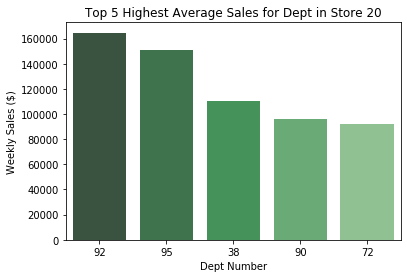

In [9]:
#See which department in Store 20 has the highest average sales
train_edited2=train_edited1
S20=train_edited2[train_edited2['Store']=='20']
S20_mean= S20.groupby(S20['Dept']).mean()

largest_5_SD=S20_mean.Weekly_Sales.nlargest(5,)
sns.barplot(largest_5_SD.index,largest_5_SD.values,order=largest_5_SD.sort_values(ascending=False)\
            .index,palette="Greens_d").set_title("Top 5 Highest Average Sales for Dept in Store 20")
plt.xlabel('Dept Number')
plt.ylabel('Weekly Sales ($)')
plt.show()

### Data Manipulation for Store 20 Dept 92

In [10]:
#Selected store 20 dept 92 as an example, and perform data manipulation as in 0 Import Data and Exploratory Data Analysis (EDA)
S20D92=S20[S20['Dept']=='92']

S20D92=S20D92.drop(['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5',\
                    'CPI','Unemployment','Store_Dept'],axis=1)

#Replace "Type" from A,B,C to 3,2,1
S20D92.Type=S20D92.Type.apply(lambda x:3 if x=='A' else(2 if x=='B' else 1))

#Replace "IsHoliday" from True and False to 1 and 0
S20D92= S20D92.applymap(lambda x: 1 if x == True else x)
S20D92= S20D92.applymap(lambda x: 0 if x == False else x)
S20D92['IsHoliday']=S20D92.IsHoliday.astype(int)

#Setting data frame date format and added two new coloumn 'Year' and 'Week' for seperating the data to visualize
S20D92.Date = pd.to_datetime(S20D92.Date,format='%Y-%m-%d')
S20D92['Year']=pd.DatetimeIndex(S20D92['Date']).year
S20D92['Week']=S20D92['Date'].dt.week

#Switching the IsHoliday value of Week 51 and Week 52 to 1 and 0 respecitvely 
for x in S20D92.index: #changing 1 to 0 for the week of 52
    Week = S20D92.at[x, "Week"]
    if Week == 52:
        S20D92.at[x, "IsHoliday"] = 0
        
for x in S20D92.index: #changing 0 to 1 for the week of 51
    Week = S20D92.at[x, "Week"]
    if Week == 51:
        S20D92.at[x, "IsHoliday"] = 1

#Changing and make Date as the index
S20D92.Date = pd.to_datetime(S20D92.Date,format='%Y-%m-%d')
S20D92.index = S20D92.Date
S20D92 = S20D92.drop('Date', axis=1)


S20D92.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Year,Week
Date,,,,,,,,
2010-02-05,20,92,195223.84,0,3,203742,2010,5
2010-02-12,20,92,170043.55,1,3,203742,2010,6
2010-02-19,20,92,164314.29,0,3,203742,2010,7
2010-02-26,20,92,147699.66,0,3,203742,2010,8
2010-03-05,20,92,169171.18,0,3,203742,2010,9


### Implement the previous train and test set and other Time Series Models with previous parameters

In [11]:
#Set train and test set
train_data_oneSD = S20D92.Weekly_Sales[:int(0.7*(len(train_final1)))]
test_data_oneSD = S20D92.Weekly_Sales[int(0.7*(len(train_final1))):]

#Implement model for AR
model_ar=AR(train_data_oneSD)
model_ar_fit=model_ar.fit()
predictions_AR_one = model_ar_fit.predict(start=100,end=142)

#Implement model for MA
model_ma = ARMA(train_data_oneSD, order=(2,0))
model_fit = model_ma.fit(disp=False)
predictions_MA_one = model_fit.predict(100,142)

#Implement model for ARIMA
model_ARIMA=ARIMA(train_data_oneSD,order=(2,0,0))
model_ARIMA_fit=model_ARIMA.fit(disp=-1)
predictions_ARIMA_one=model_ARIMA_fit.predict(start=100,end=142)

#Implement model for SARIMA
model_SARIMA = SARIMAX(train_data_oneSD, order=(1, 0, 2), seasonal_order=(1,0,1,52))
model_SARIMA_fit = model_SARIMA.fit(disp=False)
predictions_SARIMA_one=model_SARIMA_fit.predict(start=100,end=142)

#Implement model for Holt Winters
model_holt_winters = ExponentialSmoothing(train_data_oneSD, seasonal_periods=52, trend='mul',seasonal='add').fit() 
prediction_Holt_one = model_holt_winters.predict(start=100,end=142)

### Implement the previous train and test set and other Regression Models with previous parameters

In [12]:
#Set back the Store and Dept value as int for regressions to test on
S20D92['Store']=S20D92.Store.astype(str).astype(int)
S20D92['Dept']=S20D92.Dept.astype(str).astype(int)

#set train and test set
train_data, test_data = train_test_split(S20D92, train_size = 0.7,shuffle=False)
X_train, y_train = train_data[['Store', 'Dept','IsHoliday','Type','Size','Year','Week']], train_data['Weekly_Sales']
X_test, y_test = test_data[['Store', 'Dept','IsHoliday','Type','Size','Year','Week']], test_data['Weekly_Sales']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#Implement model for Decision Tree Regressor
dt = DecisionTreeRegressor(min_samples_split=62,min_samples_leaf=31,max_depth=555,random_state=42)
dt=dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#Implement model for Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=200,min_samples_split=5, min_samples_leaf=8,max_depth=100)        
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

#Implement model for XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
xgb=xgb.XGBRegressor(min_child_weight=1,max_depth=200,learning_rate=0.05,gamma=0.2,colsample_bytree=0.5)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [13]:
#Save the prediction data of DT,RFR, and XGB 
S20D92_regression=S20D92
S20D92_regression=S20D92_regression.drop(['Store','Dept','Weekly_Sales','IsHoliday','Type','Size','Year','Week'],axis=1)
S20D92_regression=S20D92_regression[100:]

S20D92_regression['WS_dt']=y_pred_dt
S20D92_regression['WS_rfr']=y_pred_rfr
S20D92_regression['WS_xgb']=y_pred_xgb

S20D92_regression.head()

,WS_dt,WS_rfr,WS_xgb
Date,,,
2012-01-06,158960.378529,167408.978383,164564.250000
2012-01-13,158960.378529,167408.978383,172157.734375
2012-01-20,158960.378529,167408.978383,160079.781250
2012-01-27,158960.378529,167408.978383,153329.171875
2012-02-03,158960.378529,167408.978383,177246.296875


### Models Comparison in Train and Test Sets 

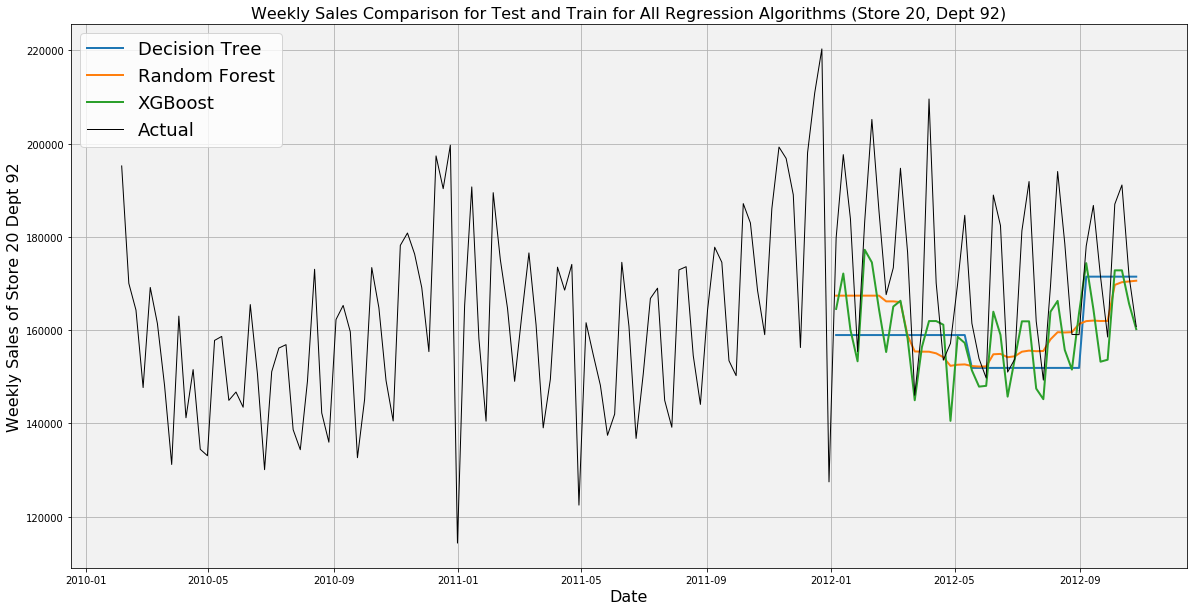

In [14]:
#Comparison of train and test set with Regression Models
fig,ax=plt.subplots(figsize=(20,10))

plt.plot(S20D92_regression.WS_dt,linewidth=2)
plt.plot(S20D92_regression.WS_rfr,linewidth=2)
plt.plot(S20D92_regression.WS_xgb,linewidth=2)
plt.plot(S20D92.Weekly_Sales,color='k',linewidth=1)

plt.legend(['Decision Tree','Random Forest','XGBoost','Actual'],loc=2,fontsize=18)
plt.grid(True)
plt.title('Weekly Sales Comparison for Test and Train for All Regression Algorithms (Store 20, Dept 92)',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Weekly Sales of Store 20 Dept 92',fontsize=16)
ax = plt.gca()
ax.set_facecolor('#f2f2f2')
plt.show()

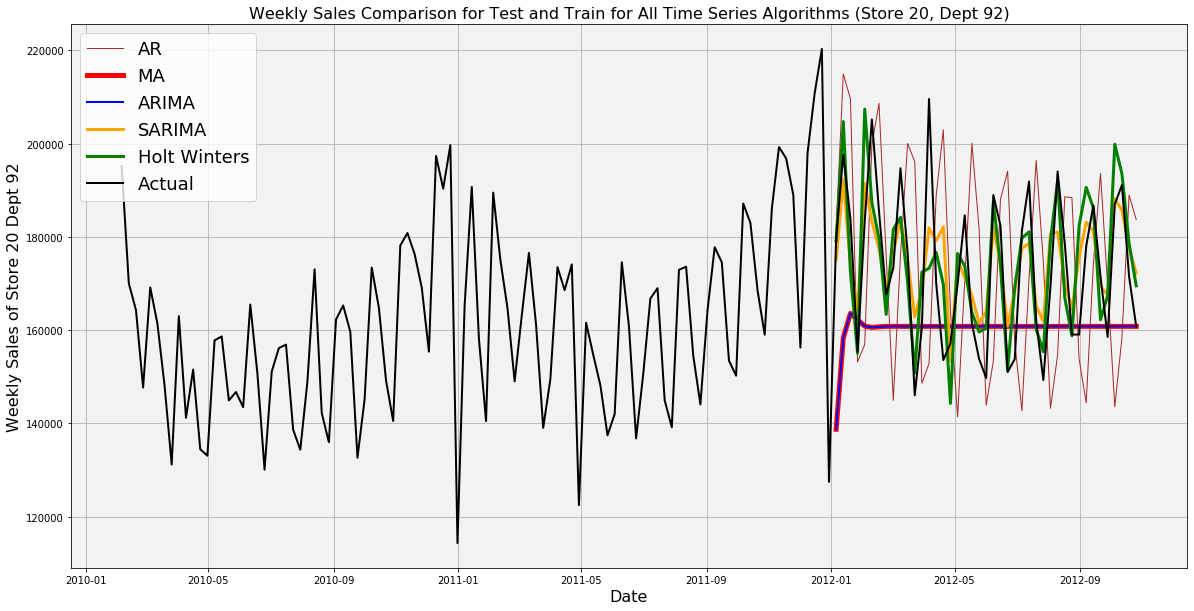

In [15]:
#Plotting the ARIMA model and compare against the actual value
fig,ax=plt.subplots(figsize=(20,10))

plt.plot(predictions_AR_one,linewidth=1,color='brown')
plt.plot(predictions_MA_one,linewidth=5,color='red')
plt.plot(predictions_ARIMA_one,linewidth=2,color='b')
plt.plot(predictions_SARIMA_one,linewidth=3,color='orange')
plt.plot(prediction_Holt_one,linewidth=3,color='g')

plt.plot(S20D92.Weekly_Sales,color='k',linewidth=2)

plt.legend(['AR','MA','ARIMA','SARIMA','Holt Winters','Actual'],loc=2,fontsize=18)
plt.grid(True)
plt.title('Weekly Sales Comparison for Test and Train for All Time Series Algorithms (Store 20, Dept 92)',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Weekly Sales of Store 20 Dept 92',fontsize=16)

ax = plt.gca()
ax.set_facecolor('#f2f2f2')
plt.show()

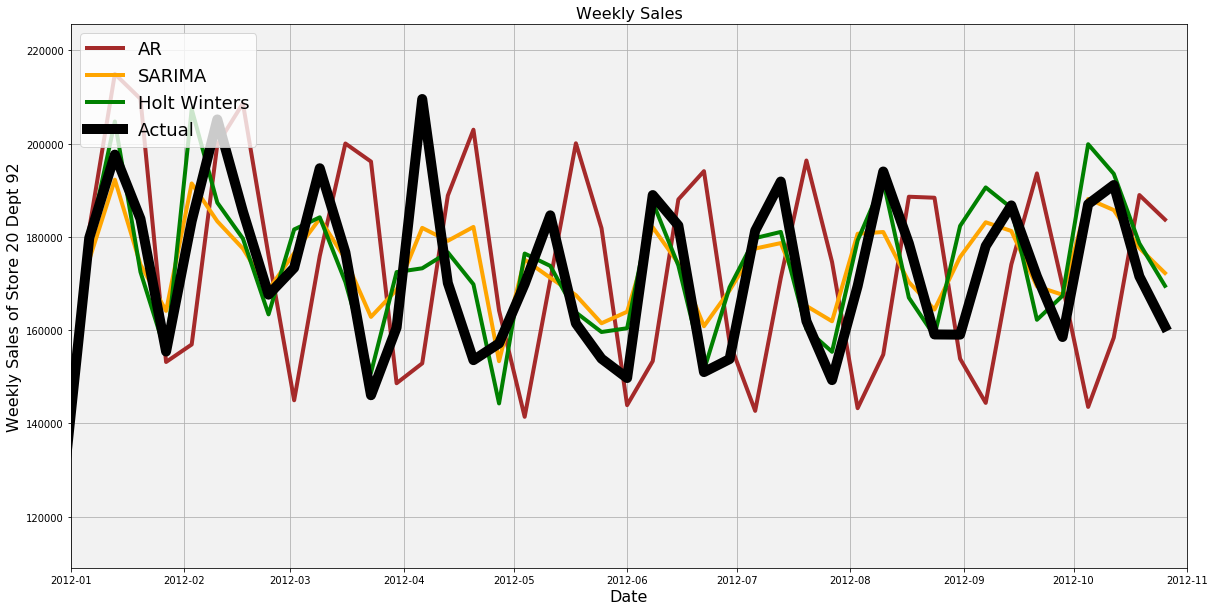

In [16]:
#Zoomed in view of the AR, SARIMA, Holt Winters, and Actual for better visualizaion
fig,ax=plt.subplots(figsize=(20,10))

plt.plot(predictions_AR_one,linewidth=4,color='brown')
plt.plot(predictions_SARIMA_one,linewidth=4,color='orange')
plt.plot(prediction_Holt_one,linewidth=4,color='green')
plt.plot(S20D92.Weekly_Sales,color='k',linewidth=10)

plt.legend(['AR','SARIMA','Holt Winters','Actual'],loc=2,fontsize=18)
plt.title('Weekly Sales',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Weekly Sales of Store 20 Dept 92',fontsize=16)
ax.set_xlim([datetime.date(2012, 1, 1), datetime.date(2012,11, 1)])
plt.grid(True)
ax = plt.gca()
ax.set_facecolor('#f2f2f2')
plt.show()

# Predicting Value for Store 20 Dept 92 in Test.csv

In [17]:
#Load Prediction set
test_kaggle = pd.read_csv (r'D:\Jupyter\Datasets\test.csv')

In [18]:
#Select only the values of Store 20 and Dept 92
S20D92_test=test_kaggle[test_kaggle['Store']==20]
S20D92_test=S20D92_test[test_kaggle['Dept']==92]
S20D92_test.head()

,Store,Dept,Date,IsHoliday
53596,20,92,2012-11-02,False
53597,20,92,2012-11-09,False
53598,20,92,2012-11-16,False
53599,20,92,2012-11-23,True
53600,20,92,2012-11-30,False


In [19]:
#S20D92_test.Date = pd.to_datetime(S20D92_test.Date,format='%Y-%m-%d')

In [20]:
#Setting Holt Winters to predict the future date
model_holt_winters = ExponentialSmoothing(train_data_oneSD, seasonal_periods=52, trend='mul',seasonal='add').fit() 
prediction_Holt_one = model_holt_winters.predict(start=0,end=142)# Predict the original dataset
prediction_Holt_two = model_holt_winters.predict(start=142,end=181)# Predict the future value, so the graph does not cut off
prediction_Holt_vis = model_holt_winters.predict(start=143,end=181)# Predict the future value (actual)

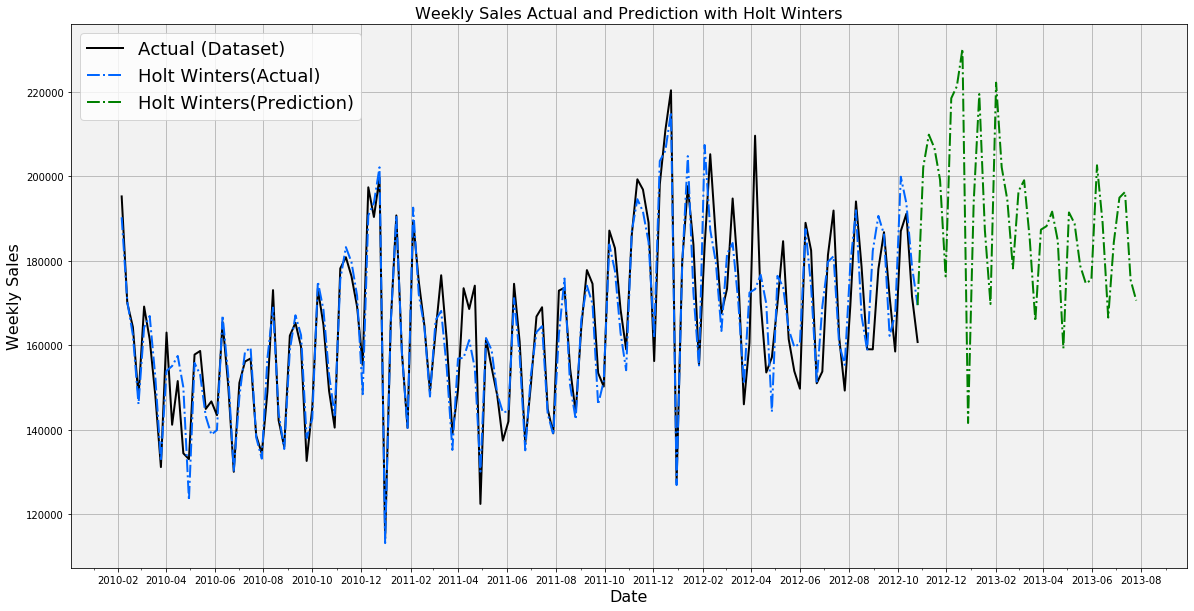

In [21]:
#Visualization of the Holt Winters predictions compared against actual
fig,ax=plt.subplots(figsize=(20,10))
plt.plot(S20D92.Weekly_Sales,color='k',linewidth=2)
plt.plot(prediction_Holt_one,linewidth=2,LS='-.',color='#0066ff')
plt.plot(prediction_Holt_two,linewidth=2,LS='-.',color='g')

plt.legend(['Actual (Dataset)','Holt Winters(Actual)','Holt Winters(Prediction)'],loc=2,fontsize=18)
plt.title('Weekly Sales Actual and Prediction with Holt Winters',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Weekly Sales',fontsize=16)

ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid(True)
ax = plt.gca()
ax.set_facecolor('#f2f2f2')
plt.show()

In [22]:
#Providing the Holt Winters predicitons with Dates
S20D92_test1=S20D92_test
S20D92_test1=S20D92_test.drop(['Store','Dept','IsHoliday'],axis=1)
S20D92_test1['Weekly_Sales']=prediction_Holt_vis.values

#Adding Year and Week for the Holt Winters Predicitons
S20D92_test1.Date = pd.to_datetime(S20D92_test1.Date,format='%Y-%m-%d')
S20D92_test1['Year']=pd.DatetimeIndex(S20D92_test1['Date']).year
S20D92_test1['Week']=S20D92_test1['Date'].dt.week

#Seperating the Holt Winters predicitons in 2012 and 2013
prediction_Holt_2012=S20D92_test1[S20D92_test1['Year']==2012]
prediction_Holt_2013=S20D92_test1[S20D92_test1['Year']==2013]

In [23]:
#Load actual data of Store 20 Department 92 
Sales2010=S20D92[S20D92['Year']==2010] 
Sales2011=S20D92[S20D92['Year']==2011] 
Sales2012=S20D92[S20D92['Year']==2012]

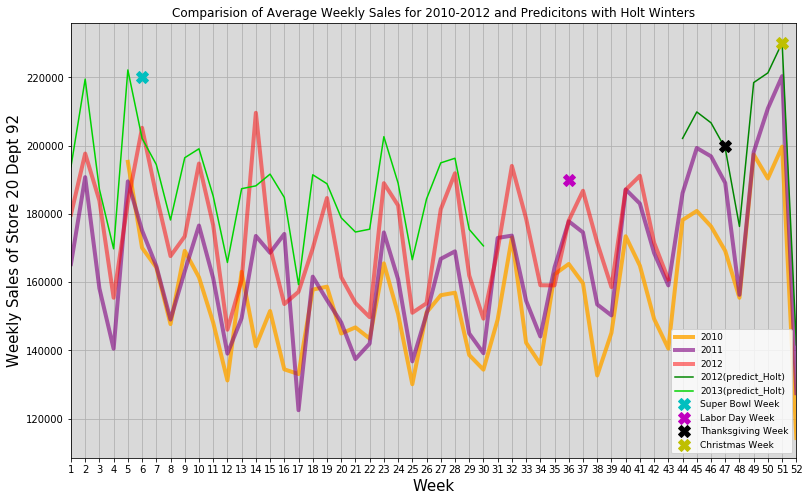

In [24]:
#visualize the weekly sales of Store 20 Department 92 for the year of 2010, 2011, 2012, and predictions with Holt Winters
plt.subplots(figsize=(13,8))
plt.plot(Sales2010.Week,Sales2010.Weekly_Sales,color='orange',alpha=0.8,linewidth=4)
plt.plot(Sales2011.Week,Sales2011.Weekly_Sales,color='purple',alpha=0.6,linewidth=4)
plt.plot(Sales2012.Week,Sales2012.Weekly_Sales,color='red',alpha=0.5,linewidth=4)

plt.plot(prediction_Holt_2012.Week,prediction_Holt_2012.Weekly_Sales,color='#008600')
plt.plot(prediction_Holt_2013.Week,prediction_Holt_2013.Weekly_Sales,color='#00d300')

plt.plot(6,220000,'Xc',markersize=12)  #Holiday mark for Super Bowl Week
plt.plot(36,190000,'Xm',markersize=12) #Holiday mark for Labor Day Week
plt.plot(47,200000,'Xk',markersize=12) #Holiday mark for Thanksgiving Wek
plt.plot(51,230000,'Xy',markersize=12) #Holiday for Christmas

plt.xticks(np.arange(1,53,step=1))
plt.legend(['2010','2011','2012','2012(predict_Holt)','2013(predict_Holt)','Super Bowl Week','Labor Day Week','Thanksgiving Week','Christmas Week'],\
           loc=4,fontsize=9)
plt.xlabel('Week',fontsize=15)
plt.ylabel('Weekly Sales of Store 20 Dept 92', fontsize=15)
plt.title('Comparision of Average Weekly Sales for 2010-2012 and Predicitons with Holt Winters')
plt.grid(True)
plt.xlim(1,52)
ax = plt.gca()
ax.set_facecolor('#d9d9d9')
plt.show()